# Housing Prices

#### Portfolio Project: House Prices

##### Objective: The goal of this analysis is to predict the price of homes based on various features of housing such as number of bedrooms, house area, furnishing, etc.

##### Data: The Housing Prices dataset from Kaggle contains 545 observations with 13 features. These features include the median value of homes (target variable) and attributes such as average number of bedrooms, bathrooms, area square footage, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
#Load data
data = pd.read_csv('Housing.csv')

## Exploratory Analysis (EDA)

In [ ]:
data.head(3)               
data.info()
data.describe()
data.shape

In [ ]:
#Checking for missing values
data.isnull().sum().any()

In [ ]:
#Data types: Converting categorical data to numerical
def convert_to_numeric(series):
    return series.astype('category').cat.codes
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data[categorical_cols] = data[categorical_cols].apply(lambda x: convert_to_numeric(x))

##Option: Using dor loop
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].astype('category')

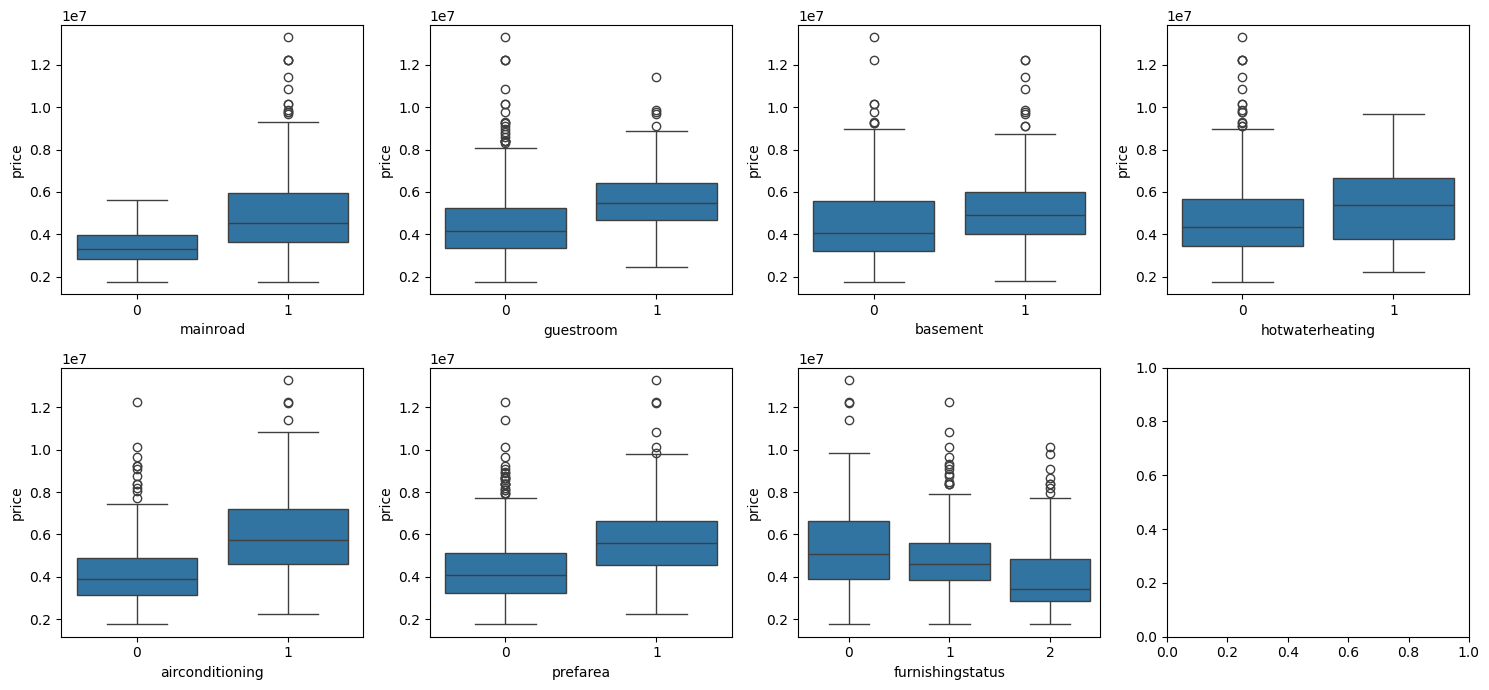

In [185]:
# Boxplots for categorical variables

fig, axes = plt.subplots(2, 4, figsize = (15, 7))
for ax, i in zip(axes.flatten(), categorical_cols):
    sns.boxplot(x = data[i], y = data['price'], ax=ax)
plt.tight_layout()

<AxesSubplot:xlabel='parking', ylabel='price'>

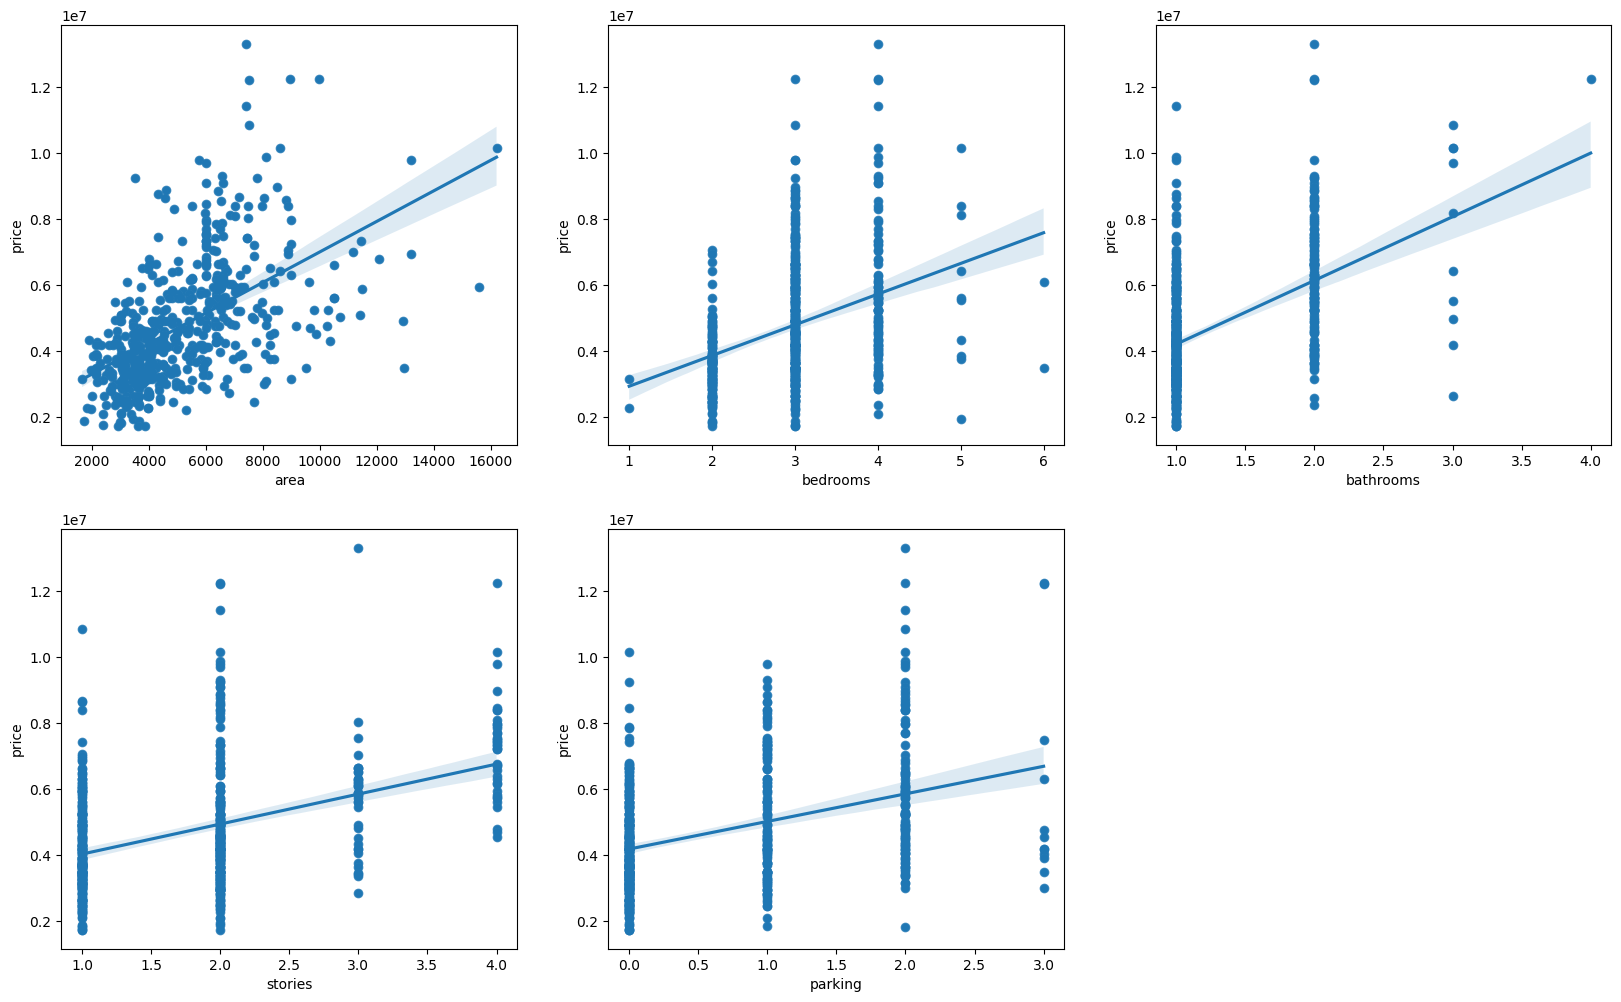

In [203]:
# Scatterplots for quantitative variables
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.scatterplot(x = 'area', y = 'price', data = data)
sns.regplot(x = 'area', y = 'price', data=data)

plt.subplot(2,3,2)
sns.scatterplot(x = 'bedrooms', y = 'price', data = data)
sns.regplot(x = 'bedrooms', y = 'price', data = data)

plt.subplot(2,3,3)
sns.scatterplot(x = 'bathrooms', y = 'price', data = data)
sns.regplot(x = 'bathrooms', y = 'price', data = data)

plt.subplot(2,3,4)
sns.scatterplot(x = 'stories', y = 'price', data = data)
sns.regplot(x = 'stories', y = 'price', data = data)

plt.subplot(2,3,5)
sns.scatterplot(x = 'parking', y = 'price', data = data)
sns.regplot(x = 'parking', y = 'price', data = data)

In [ ]:
# Correlation matrix
data.corr()['price'].sort_values(ascending = False)

## Regression Analysis

In [ ]:
#Split data
train_data, test_data = train_test_split(data, test_size = 0.3, random_state=123)
np.random.seed(0)
print(train_data.shape)
print(test_data.shape)

In [210]:
#Fit Linear regression model
def fit_model(data, formula):
    model = sm.OLS.from_formula(formula, data = data).fit()
    return model

full_model = fit_model(train_data, 'price ~ area + bedrooms + bathrooms + stories + parking + mainroad + guestroom + basement + hotwaterheating + airconditioning + prefarea + furnishingstatus')
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     71.39
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.66e-88
Time:                        16:25:32   Log-Likelihood:                -5811.1
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     368   BIC:                         1.170e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.284e+05   2.98e+05  

In [208]:
#Reduced model 
reduced_model = fit_model(train_data, 'price ~ area + bathrooms + stories + parking + hotwaterheating + airconditioning')
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     106.2
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.13e-77
Time:                        16:19:25   Log-Likelihood:                -5850.6
No. Observations:                 381   AIC:                         1.172e+04
Df Residuals:                     374   BIC:                         1.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.543e+05   2.08e+05     

In [216]:
#Compare models
anova_model = sm.stats.anova_lm(reduced_model, full_model)
print(anova_model)
print(f'Reduced model adj R^2:{reduced_model.rsquared_adj}')
print(f'Full model adj R^2:{full_model.rsquared_adj}')

   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0     374.0  4.857907e+14      0.0           NaN        NaN           NaN
1     368.0  3.947655e+14      6.0  9.102524e+13  14.142273  1.664119e-14
Reduced model adj R^2:0.6243102740897295
Full model adj R^2:0.6897276615212775


In [219]:
#Prediction
predict_reduced = reduced_model.predict(test_data)
predict_full = full_model.predict(test_data)